In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/neerajprasad209/Dataset/main/gender_classification_v7.csv')

In [4]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [8]:
df['gender'] = df['gender'].map({'Female': 0, "Male":1})

# Seperate Dependent And Independent Vatiable

In [9]:
X = df.iloc[:,:-1]
y = df['gender']

In [10]:
X.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [11]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: gender, dtype: int64

# *Perfoming the train test Split*

In [12]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest, ytrain,ytest = train_test_split(X,y, test_size=0.20, random_state=42)

In [13]:
Xtrain.shape, Xtest.shape

((4000, 7), (1001, 7))

In [14]:
ytrain.shape, ytest.shape

((4000,), (1001,))

# *Traning the Model*

In [27]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=1)

In [28]:
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=1)

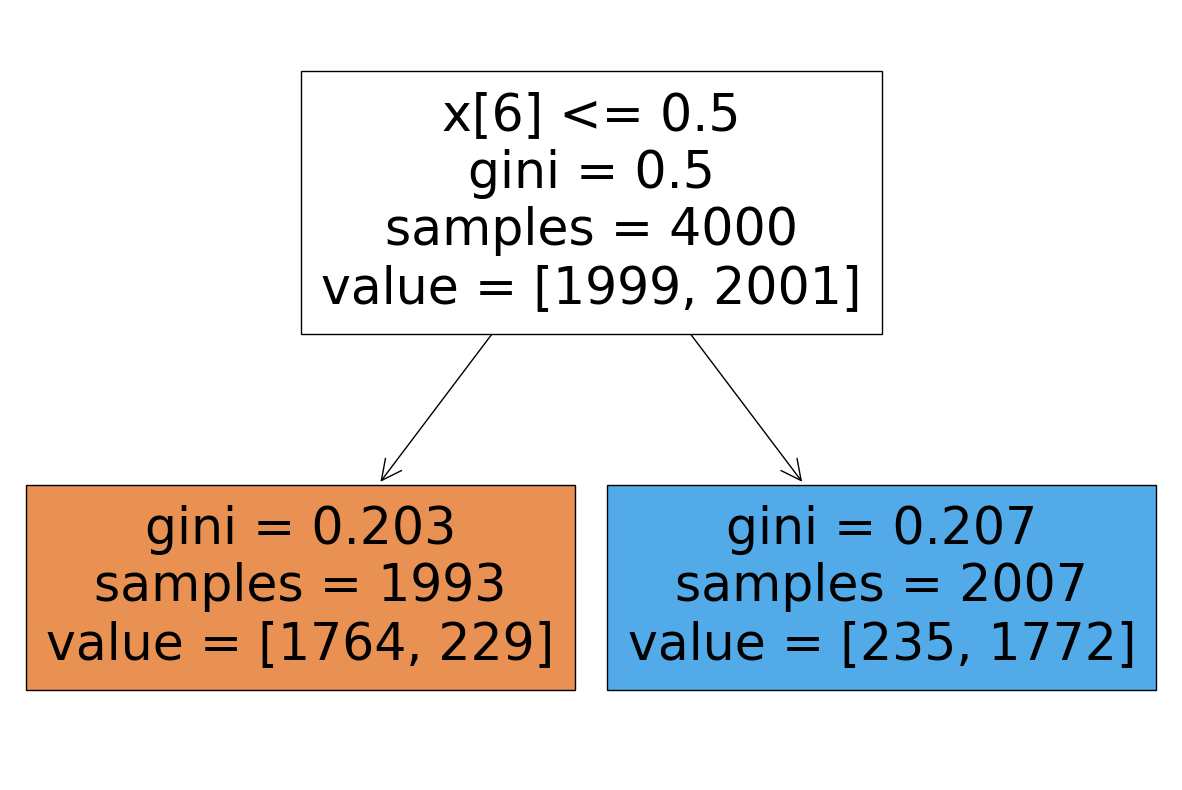

In [29]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()

In [30]:
ypred = model.predict(Xtest)

In [31]:
ypred

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Accuracy Score: {accuracy_score(ypred,ytest)}")
print("\n=============================================================================\n")
print(f"Classification Report: \n {classification_report(ypred,ytest)}")

Accuracy Score: 0.8511488511488512


Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       513
           1       0.84      0.86      0.85       488

    accuracy                           0.85      1001
   macro avg       0.85      0.85      0.85      1001
weighted avg       0.85      0.85      0.85      1001



In [38]:
parameter = {
    'criterion': ["gini",'entropy','log_loss'],
    'splitter': ['best','random'],
    'max_depth': [1,2,3,4,5],
    'max_features': ['auto','sqrt','log2']
}

In [39]:
from sklearn.model_selection import GridSearchCV

classifer = DecisionTreeClassifier()
clf = GridSearchCV(classifer,param_grid=parameter, cv=5, scoring='accuracy')

In [40]:
clf.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [41]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [42]:
y_pred = clf.predict(Xtest)

In [46]:
print(f"Accuracy Score: {accuracy_score(y_pred,ytest)}")
print("\n=============================================================================\n")
print(f"Classification Report: \n {classification_report(y_pred,ytest)}")
print("\n=============================================================================\n")
print(f"Confusion Matrix: \n {confusion_matrix(y_pred,ytest)}")

Accuracy Score: 0.9470529470529471


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       535
           1       0.91      0.98      0.95       466

    accuracy                           0.95      1001
   macro avg       0.95      0.95      0.95      1001
weighted avg       0.95      0.95      0.95      1001



Confusion Matrix: 
 [[492  43]
 [ 10 456]]
